# Emergency 911 Calls - Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('911.csv')
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1


In [4]:
df.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e'], dtype='object')

In [5]:
df.describe

<bound method NDFrame.describe of              lat        lng  \
0      40.297876 -75.581294   
1      40.258061 -75.264680   
2      40.121182 -75.351975   
3      40.116153 -75.343513   
4      40.251492 -75.603350   
...          ...        ...   
99487  40.132869 -75.333515   
99488  40.006974 -75.289080   
99489  40.115429 -75.334679   
99490  40.186431 -75.192555   
99491  40.207055 -75.317952   

                                                    desc      zip  \
0      REINDEER CT & DEAD END;  NEW HANOVER; Station ...  19525.0   
1      BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...  19446.0   
2      HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...  19401.0   
3      AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...  19401.0   
4      CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...      NaN   
...                                                  ...      ...   
99487  MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...  19401.0   
99488  LANCASTER AVE & RITTENHOUSE PL; LO

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [8]:
#Q1) What are the top 5 zipcodes for 911 calls?
df['zip'].value_counts().iloc[:5]

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [10]:
#Q2) ** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and
# Traffic. Use .apply() with a custom function to create a new column called "Reason" that contains this string value.**
# **For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **
df['Reasons']=df['title'].apply(lambda n:n.split(':')[0])
df['Reasons']

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: Reasons, Length: 99492, dtype: object

In [11]:
#Q3) What is the most common Reason for a 911 call based off of this new column?
df['Reasons'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reasons, dtype: int64

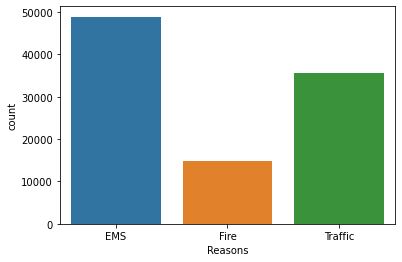

In [12]:
#Q4) Now use seaborn to create a countplot of 911 calls by Reason
sns.countplot('Reasons',data=df)

In [14]:
#Q5) What is the data type of the objects in the timeStamp column?
type(df['timeStamp'].iloc[0])

str

In [16]:
#Q6) You should have seen that these timestamps are still strings. Use pd.to_datetime to convert the column from strings to
# DateTime objects.
df['timeStamp']=pd.to_datetime(df['timeStamp'])
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [26]:
df['timeStamp']

0       2015-12-10 17:40:00
1       2015-12-10 17:40:00
2       2015-12-10 17:40:00
3       2015-12-10 17:40:01
4       2015-12-10 17:40:01
                ...        
99487   2016-08-24 11:06:00
99488   2016-08-24 11:07:02
99489   2016-08-24 11:12:00
99490   2016-08-24 11:17:01
99491   2016-08-24 11:17:02
Name: timeStamp, Length: 99492, dtype: datetime64[ns]

In [27]:
#Q7) ** You can now grab specific attributes from a Datetime object by calling them. For example:**
# time = df['timeStamp'].iloc[0]
# time.hour
# **You can use Jupyter's tab method to explore the various attributes you can call. Now that the
# timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour,
# Month, and Day of Week. You will create these columns based off of the timeStamp column.** 
time=df['timeStamp'].iloc[0]
time.hour

17

In [28]:
#solution
df['Hour']=df['timeStamp'].apply(lambda h:h.hour)
df['Month']=df['timeStamp'].apply(lambda m:m.month)
df['Day of Week'] = df['timeStamp'].apply(lambda d:d.dayofweek)
df.sample()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons,Hour,Month,Day of Week
75238,39.956497,-75.248064,N 63RD ST; LOWER MERION; Station 313; 2016-06...,NaN,EMS: UNKNOWN MEDICAL EMERGENCY,2016-06-23 00:06:01,LOWER MERION,N 63RD ST,1,EMS,0,6,3


In [29]:
#Q8) Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to 
# the day of the week:
# dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
new_dayofweek=df['Day of Week'].map(dmap)
new_dayofweek

0        Thu
1        Thu
2        Thu
3        Thu
4        Thu
        ... 
99487    Wed
99488    Wed
99489    Wed
99490    Wed
99491    Wed
Name: Day of Week, Length: 99492, dtype: object

In [30]:
#another method
df['Day of Week'] = df['Day of Week'].apply(lambda i:dmap[i])
df['Day of Week']

0        Thu
1        Thu
2        Thu
3        Thu
4        Thu
        ... 
99487    Wed
99488    Wed
99489    Wed
99490    Wed
99491    Wed
Name: Day of Week, Length: 99492, dtype: object

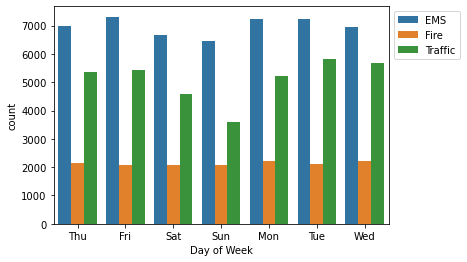

In [32]:
#Q9) Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column
sns.countplot('Day of Week',data=df,hue='Reasons')
plt.legend(bbox_to_anchor=(1,1))

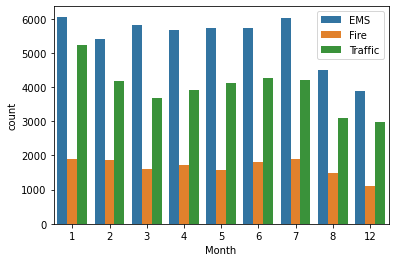

In [34]:
#Q10) You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting
# the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll
# need to do some work with pandas. Now create a gropuby object called byMonth, where you group the DataFrame by the month
# column and use the count() method for aggregation. Use the head() method on this returned DataFrame
sns.countplot('Month',hue='Reasons',data=df)
plt.legend(bbox_to_anchor=(1,1))

In [35]:
#solution
by_month=df.groupby('Month').count()
by_month

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


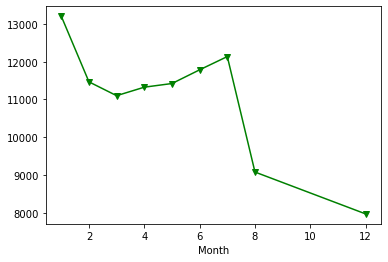

In [36]:
#Q11) Now create a simple plot off of the dataframe indicating the count of calls per month
by_month['lng'].plot(color='green',marker='v')

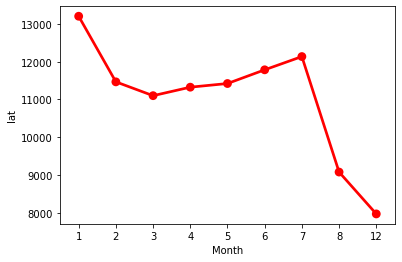

In [37]:
sns.pointplot(by_month.index,'lat', data=by_month, markers='o',color='red')

In [38]:
#Q12) Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month.Keep in mind you
# may need to reset the index to a column.
by_month['Month']=by_month.index
by_month

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons,Hour,Day of Week,Month
Month,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,1
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,2
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,3
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,4
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,5
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786,6
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137,7
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078,8
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969,12


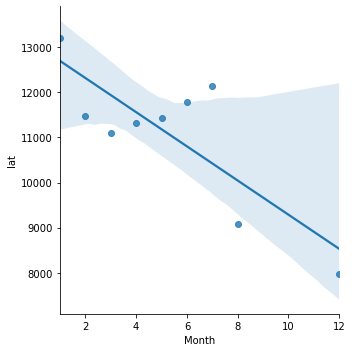

In [39]:
sns.lmplot('Month','lat', data=by_month)

In [41]:
#Q13) Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along
# with the .date() method.
df['Date']=df['timeStamp'].apply(lambda d:d.date())
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


In [42]:
#Q14) Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls
by_date=df.groupby('Date').count()
by_date.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons,Hour,Month,Day of Week
Date,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447


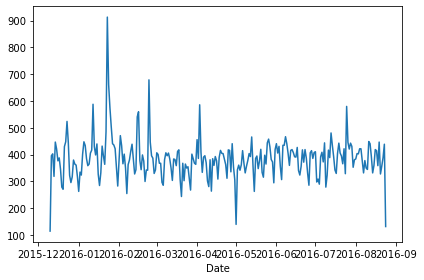

In [43]:
by_date['lat'].plot()
plt.tight_layout()

Text(0.5, 1.0, 'Traffic')

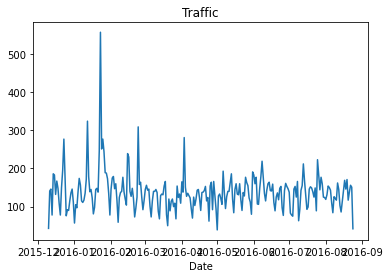

In [44]:
#Q15) Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call
df[df['Reasons']=='Traffic'].groupby(by='Date').count()['lat'].plot()
plt.title('Traffic')

Text(0.5, 1.0, 'Fire')

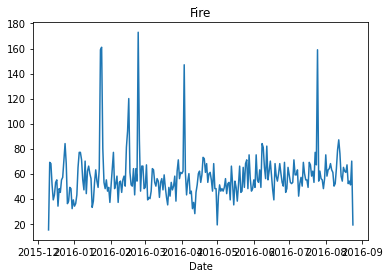

In [45]:
df[df['Reasons']=='Fire'].groupby(by='Date').count()['lat'].plot()
plt.title('Fire')

Text(0.5, 1.0, 'EMS')

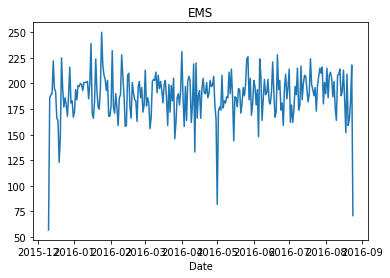

In [46]:
df[df['Reasons']=='EMS'].groupby(by='Date').count()['lat'].plot()
plt.title('EMS')

In [47]:
#Q16) Now let's move on to creating heatmaps with seaborn and our data. We'll first need to restructure the dataframe so
# that the columns become the Hours and the Index becomes the Day of the Week
new_df = df.groupby(by=['Day of Week','Hour']).count()['lat'].unstack()
new_df = new_df.loc[['Sun','Mon','Tue','Wed','Thu','Fri','Sat']]
new_df

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467


Text(0.5, 1.0, 'Heat Map')

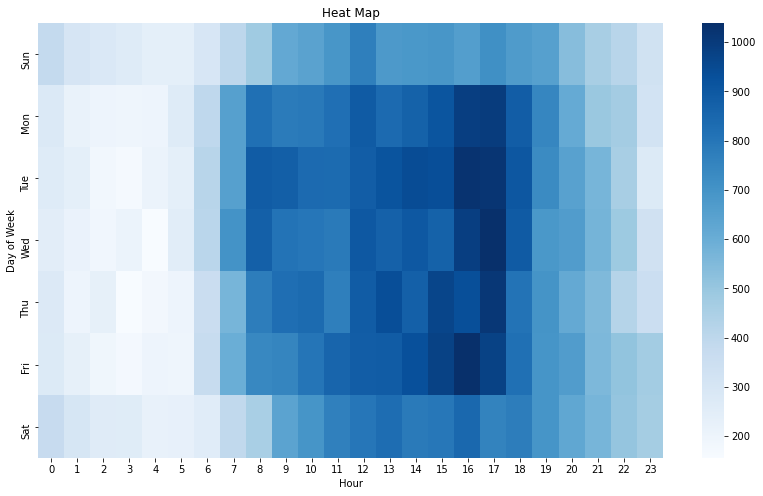

In [48]:
plt.figure(figsize=(14,8))
sns.heatmap(new_df,cmap='Blues')
plt.title("Heat Map")